# ANALYSIS:

•	As expected the hottest temperatures are being seen on the northern hemisphere given the inverse seasonal relationship.

•	Humidity appears to increase the closer we move to zero latitude.

•	Latitude appears to have no visible influence on either wind speed and cloudiness.  

•	Taking a closer look through gmaps, we can see a very well distributed sample of randomly selected cities.


In [24]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import openweathermapy as owm
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

now = dt.datetime.today().strftime("%m/%d/%y")

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
settings = {"units":"imperial", "appid":api_key}
df = pd.DataFrame(cities)
df = df.rename(columns={0:'city'})
df.head(2)

,city
0,airai
1,bintulu


In [4]:
def get_weather(city):
    weather = np.nan
    try:
        weather = owm.get_current(city, **settings)
        print(f"Processing Record | {city}")
    except Exception as e:
        print("Missing field/result... skipping.")
    return weather
#need to add a try and accept

In [5]:
df['weather_data'] = df["city"].map(get_weather)

Processing Record | airai
Processing Record | bintulu
Processing Record | yellowknife
Processing Record | constitucion
Processing Record | rikitea
Processing Record | xinzhi
Processing Record | changji
Missing field/result... skipping.
Processing Record | honiara
Processing Record | gravdal
Processing Record | albany
Processing Record | hithadhoo
Processing Record | busselton
Processing Record | qingdao
Processing Record | skjervoy
Processing Record | mitchell
Processing Record | clyde river
Processing Record | barrow
Missing field/result... skipping.
Processing Record | touros
Processing Record | castro
Missing field/result... skipping.
Processing Record | antalaha
Processing Record | rio gallegos
Processing Record | bluff
Processing Record | henties bay
Processing Record | atuona
Processing Record | khatanga
Processing Record | provideniya
Processing Record | qaanaaq
Processing Record | faya
Processing Record | bilibino
Processing Record | vaini
Processing Record | port elizabeth
Pro

Processing Record | khorramshahr
Processing Record | kieta
Processing Record | ostrovnoy
Processing Record | guane
Processing Record | amahai
Processing Record | birobidzhan
Processing Record | faanui
Processing Record | hurricane
Processing Record | nata
Missing field/result... skipping.
Processing Record | bubaque
Processing Record | mityana
Processing Record | mildura
Processing Record | aykhal
Processing Record | yorosso
Processing Record | namibe
Processing Record | benavente
Processing Record | vila velha
Processing Record | blagoyevo
Processing Record | sarzana
Processing Record | naze
Processing Record | funtua
Processing Record | dauriya
Processing Record | pouembout
Processing Record | karratha
Processing Record | lagoa
Processing Record | bafq
Processing Record | trincomalee
Processing Record | salalah
Processing Record | otacilio costa
Processing Record | cayenne
Processing Record | havre-saint-pierre
Missing field/result... skipping.
Processing Record | marienburg
Processi

Processing Record | manavgat
Processing Record | inuvik
Processing Record | sinegorye
Processing Record | college
Processing Record | porosozero
Processing Record | marsh harbour
Processing Record | sosnovo-ozerskoye
Processing Record | the valley
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record | mayumba
Processing Record | sartell
Processing Record | griffith
Missing field/result... skipping.
Processing Record | ilam
Processing Record | morropon
Processing Record | cumaral
Processing Record | jinsha
Processing Record | la candelaria
Processing Record | abu dhabi
Processing Record | gejiu
Processing Record | hokitika
Missing field/result... skipping.
Processing Record | paez
Processing Record | ishigaki
Processing Record | vardo
Processing Record | lenoir city
Processing Record | burnie
Processing Record | novobirilyussy
Processing Record | kirkwood
Missing field/result... skipping.
Processing Record | mehamn
Processing Record | de-kastri
Processin

In [6]:
df = df.dropna()
df.count()

city            574
weather_data    574
dtype: int64

In [7]:
df['lat'] = df['weather_data'].map(lambda temp: temp("coord.lat"))
df['lon'] = df['weather_data'].map(lambda temp: temp("coord.lon"))
df['temp'] = df['weather_data'].map(lambda temp: temp("main.temp"))
df['humid'] = df['weather_data'].map(lambda temp: temp("main.humidity"))
df['wind'] = df['weather_data'].map(lambda temp: temp("wind.speed"))
df['clouds'] = df['weather_data'].map(lambda temp: temp("clouds.all"))
df = df.reset_index(drop=True)
df.head(2)

,city,weather_data,lat,lon,temp,humid,wind,clouds
0,airai,"{'coord': {'lon': 125.41, 'lat': -8.93}, 'weat...",-8.93,125.41,67.90,88,1.48,8
1,bintulu,"{'coord': {'lon': 113.03, 'lat': 3.17}, 'weath...",3.17,113.03,75.04,100,3.36,75


In [131]:
def get_plots(y, c='r'):
    '''
    Y__USES: 'temp', 'humid', 'wind', 'clouds'
    
    Creates scatter plots for temperature, humidity, wind, or clouds 
    based on latitude.
    '''
    df.plot.scatter(x='lat', y=y, color=c)
    plt.grid(which='major', linestyle=':', linewidth=1, color='k')
    plt.xlabel("Latitude")
    
    try:
        if y == 'temp':
            plt.title(f"City Latitude vs 'Max Temperature' ({now})")
            plt.ylabel("Max Temperature (F)")
            plt.savefig('City_Latitude_v_Max_Temp.png')
        elif y == 'humid':
            plt.title(f'City Latitude vs Humidity ({now})')
            plt.ylabel('Humidity (%)')
            plt.savefig('City_Latitude_v_Humidity.png')
        elif y =='wind':
            plt.title(f'City Latitude vs Wind ({now})')
            plt.ylabel('Cloudiness (%)')
            plt.savefig('City_Latitude_v_Wind.png')
        elif y == 'clouds':
            plt.title(f'City Latitude vs Cloudiness ({now})')
            plt.ylabel('Cloudiness (%)')
            plt.savefig('City_Latitude_v_Clouds.png')
        else:
            print("Please select: 'temp', 'wind', 'clouds','humid'")
        return plt.show()
    
    except Exception as e:
        print('Please see doc string instructions')

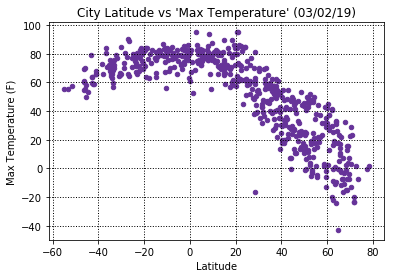

In [132]:
get_plots('temp', 'rebeccapurple')

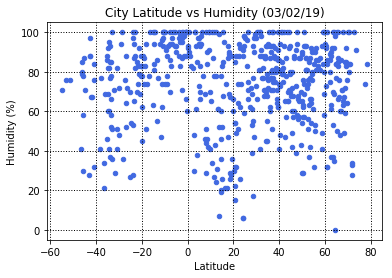

In [133]:
get_plots('humid', 'royalblue')

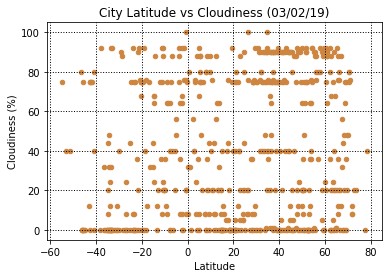

In [134]:
get_plots('clouds', 'peru')

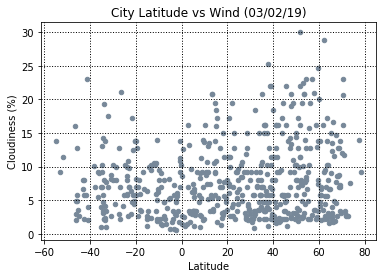

In [135]:
get_plots('wind', 'lightslategray')

In [136]:
send_csv = df.to_csv('weather_data.csv', index=False)